# Data Analysis EDA

In [4]:
# Importing the dataset to Google's Colaboratory

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# Reading the files
import pandas as pd 
import numpy as np

pd.read_csv('train.csv')

,ID,para_0,para_1,para_2,para_3,para_4,para_5,para_6,para_7,para_8,para_9,para_10,para_11,para_12,para_13,para_14,para_15,para_16,para_17,para_18,para_19,para_20,para_21,para_22,para_23,para_24,para_25,para_26,para_27,para_28,para_29,para_30,para_31,para_32,para_33,para_34,para_35,para_36,para_37,para_38,para_39,para_40,para_41,para_42,para_43,para_44,para_45,para_46,para_47,para_48,para_49,para_50,Result
0,1,0.97122,0.83152,-0.57052,0.99590,0.762820,0.032973,-0.69248,-0.55397,-0.473470,-0.09707,1.39640,-0.34908,-0.189370,-1.03800,-0.192460,0.35957,-0.132290,0.586730,0.487490,-1.356700,-0.281500,0.335740,-0.059181,-0.271410,0.103530,0.42440,0.092545,-0.091193,-0.173160,-0.440330,1.60020,-1.03800,-0.092482,-0.22559,-0.42105,-0.35232,-0.21201,-0.340320,-0.154030,-0.26431,-0.20691,-0.16374,-0.112290,0.12326,0.990180,-0.50457,0.12478,0.36049,-0.10158,-0.36256,0.21309,h0
1,2,-0.47565,0.43977,-0.50892,-0.35476,-0.435490,-0.618170,0.62963,-0.28157,-0.229950,2.35250,1.23590,1.36080,0.404390,0.65202,-0.115130,0.57901,-0.157200,0.586730,0.385760,0.994220,0.080881,0.020912,0.014107,-0.304380,0.168210,0.18967,0.245290,-0.088506,0.122500,-0.242670,-0.67335,0.65202,0.050869,-0.22559,-0.22077,-0.22369,-0.26602,-0.262150,-0.222240,-0.26431,-0.26418,-0.16374,0.026975,-0.55423,0.004867,-0.28715,-0.55678,-0.48990,-0.56377,-0.22229,0.63568,h0
2,3,-0.48641,-0.26590,-0.71295,-0.42638,-0.022972,-0.336080,0.15184,-0.28157,-0.227910,2.35250,0.58322,1.36080,0.164360,0.45319,-0.029048,-1.20690,-0.147480,0.020298,0.108000,-0.288110,-0.113490,-1.653900,-1.201000,-0.477500,-0.818280,-0.91991,-0.837750,-0.118230,-0.338880,-0.242670,-0.42074,0.45319,0.050869,-0.22559,-0.42105,-0.35232,0.59285,1.786300,0.450580,-0.26431,0.59264,0.51981,0.026975,-0.46864,-1.242700,-0.49820,-0.47720,-0.41047,0.22427,-0.21519,-0.16009,h3
3,4,-0.99236,-1.06970,-0.87621,-0.98453,-0.091183,-0.701840,0.35559,0.26323,0.138290,-0.64141,-0.44791,-0.25672,-0.017421,0.75143,-0.141110,-1.03100,-0.149370,-0.042639,-0.259650,-0.288110,-0.521820,0.020912,0.077348,0.003369,0.310940,-0.24367,-0.230280,-0.111510,-0.227560,-0.440330,-0.67335,0.75143,0.122540,-0.22559,-0.42105,-0.35232,0.18406,0.839770,0.273700,-0.26431,0.18650,-0.16374,0.096610,-0.41310,-1.244000,-0.53871,-0.41947,-0.31858,0.63729,-0.21295,-0.57671,h0
4,5,-0.45878,-0.55809,-0.28180,-0.50519,-0.424630,0.050215,0.35867,0.67183,0.045001,-0.64141,-0.64092,-0.23825,-0.211170,0.35378,-0.157740,0.88399,-0.155920,0.586730,0.254910,-0.020972,0.560580,0.020912,-0.049265,0.003369,0.007807,0.18967,0.125570,-0.103500,0.090312,-0.242670,-0.29443,0.35378,0.122540,-0.22559,-0.42105,-0.35232,-0.24167,-0.056837,-0.207210,-0.26431,-0.25357,1.54510,0.305510,-0.57834,-1.519900,-0.46202,-0.55678,-0.48990,-0.27750,-0.46486,0.42153,h0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,1525,1.38650,0.83152,-0.23966,1.16080,0.923160,0.763810,-1.12100,-0.55397,-0.539690,-0.23316,1.32070,-0.34380,-0.192610,-1.48540,-0.154910,-0.29538,-0.088261,1.530800,1.715000,1.849100,0.625960,1.122800,-0.391090,1.205600,-0.301560,0.59311,0.418750,0.137180,0.004737,-0.440330,2.16860,-1.48540,-0.092482,0.59740,-0.42105,-0.35232,-0.12729,-0.057778,-0.077732,0.59720,-0.12208,-0.16374,-0.112290,-0.36328,0.990180,-0.54541,-0.33836,-0.21738,-0.56571,-0.46486,0.71176,h0
1525,1526,-0.50624,-0.58481,-0.33987,-0.49442,-0.408920,-0.090004,0.39949,0.67183,0.059521,-0.64141,-0.64709,-0.23825,-0.208170,0.10525,-0.159520,1.16380,-0.156930,0.586730,0.094175,-0.288110,0.547780,0.020912,-0.138920,0.003369,-0.249330,0.18967,0.002750,-0.113030,0.029751,-0.045005,-0.10496,0.10525,0.122540,-0.22559,-0.42105,-0.35232,-0.26179,-0.162320,-0.231490,-0.26431,-0.27584,1.88690,0.305510,-0.57834,-1.348800,-0.54541,-0.55678,-0.48990,-0.53790,-0.46486,0.68376,h0
1526,1527,-0.59253,0.73765,-0.62354,-0.56530,-0.734340,-0.599120,0.88843,-

In [20]:
# import our packages & reading more about the given dataset

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 53 columns):
ID         1529 non-null int64
para_0     1529 non-null float64
para_1     1529 non-null float64
para_2     1529 non-null float64
para_3     1529 non-null float64
para_4     1529 non-null float64
para_5     1529 non-null float64
para_6     1529 non-null float64
para_7     1529 non-null float64
para_8     1529 non-null float64
para_9     1529 non-null float64
para_10    1529 non-null float64
para_11    1529 non-null float64
para_12    1529 non-null float64
para_13    1529 non-null float64
para_14    1529 non-null float64
para_15    1529 non-null float64
para_16    1529 non-null float64
para_17    1529 non-null float64
para_18    1529 non-null float64
para_19    1529 non-null float64
para_20    1529 non-null float64
para_21    1529 non-null float64
para_22    1529 non-null float64
para_23    1529 non-null float64
para_24    1529 non-null float64
para_25    1529 non-null float64
para

In [21]:
# Checking for outlier and missing values
train.isnull().sum(axis= 0).to_frame('missing_val').reset_index()

,index,missing_val
0,ID,0
1,para_0,0
2,para_1,0
3,para_2,0
4,para_3,0
5,para_4,0
6,para_5,0
7,para_6,0
8,para_7,0
9,para_8,0


In [22]:
# Checking for outlier and missing values

#from scipy.stats import norm
train.describe()

,ID,para_0,para_1,para_2,para_3,para_4,para_5,para_6,para_7,para_8,para_9,para_10,para_11,para_12,para_13,para_14,para_15,para_16,para_17,para_18,para_19,para_20,para_21,para_22,para_23,para_24,para_25,para_26,para_27,para_28,para_29,para_30,para_31,para_32,para_33,para_34,para_35,para_36,para_37,para_38,para_39,para_40,para_41,para_42,para_43,para_44,para_45,para_46,para_47,para_48,para_49,para_50
count,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000
mean,765.000000,0.069654,0.111695,-0.009978,0.097618,0.082743,-0.015951,-0.067474,0.037059,-0.008404,0.012496,0.004589,-0.000233,-0.006582,-0.031097,-0.011434,-0.029888,0.014349,-0.039168,-0.095398,0.026492,-0.018325,-0.023610,0.037411,0.020196,0.000341,-0.024934,-0.071952,-0.013718,-0.029600,-0.009781,0.045759,-0.031097,0.005585,-0.032087,-0.008838,0.055509,0.003546,0.003779,0.008901,0.018611,0.003494,0.013182,0.004207,-0.017619,-0.050971,-0.023989,-0.017956,-0.031104,0.059441,-0.007068,-0.057702
std,441.528595,0.947575,0.945773,0.987775,0.956611,0.934664,0.984815,0.939831,1.186972,0.930947,1.038452,0.973810,0.689866,0.842024,1.004369,0.819257,0.966456,1.076428,1.080907,1.088757,1.043093,0.667366,1.012858,1.005440,1.087843,1.029308,0.871950,0.929430,0.813086,0.757925,0.998436,1.028802,1.004369,1.406437,0.772486,1.027414,2.291032,1.052798,1.120427,1.067548,0.959338,1.052209,1.169319,1.400927,0.987537,1.012380,0.992718,0.986140,0.965602,0.950242,1.018283,0.962334
min,1.000000,-1.105200,-3.735600,-0.984110,-1.065200,-1.239500,-0.880580,-1.763800,-0.826370,-0.709950,-0.913580,-1.859700,-0.396570,-0.493670,-3.274800,-0.311850,-1.771500,-0.160590,-2.233800,-2.719400,-3.393800,-1.594200,-1.962400,-3.424300,-1.439200,-1.398600,-0.981900,-1.751000,-0.177400,-0.569170,-0.440330,-0.673350,-3.274800,-0.092482,-0.225590,-0.421050,-0.352320,-0.418530,-0.656770,-0.371370,-0.264310,-0.413690,-0.163740,-0.112290,-0.578340,-2.403700,-0.545410,-0.556780,-0.489900,-0.784590,-0.464860,-2.131800
25%,383.000000,-0.555570,-0.031557,-0.598380,-0.568180,-0.525040,-0.618170,-0.845530,-0.417770,-0.363480,-0.641410,-0.660270,-0.330610,-0.251630,-0.640350,-0.195790,-0.771830,-0.158400,-1.112600,-1.045800,-0.288110,-0.396050,-0.860580,-0.427250,-0.477500,-0.480500,-0.637640,-0.775760,-0.118230,-0.248940,-0.440330,-0.673350,-0.640350,-0.092482,-0.225590,-0.421050,-0.352320,-0.367690,-0.547520,-0.325130,-0.264310,-0.365980,-0.163740,-0.112290,-0.578340,-0.562050,-0.545410,-0.556780,-0.489900,-0.561970,-0.464860,-0.293410
50%,765.000000,-0.175470,0.425360,-0.474750,-0.221150,-0.159160,-0.302150,0.234560,-0.281570,-0.200400,-0.369240,-0.450360,-0.267280,-0.192950,0.502900,-0.162650,0.235880,-0.157110,0.586730,0.113790,-0.288110,-0.088525,0.020912,-0.008016,-0.477500,-0.359410,0.189670,0.010968,-0.114700,-0.167480,-0.440330,-0.547050,0.502900,-0.092482,-0.225590,-0.421050,-0.352320,-0.259670,-0.259330,-0.217610,-0.264310,-0.259930,-0.163740,-0.112290,-0.511910,0.020510,-0.431850,-0.502570,-0.440060,-0.284940,-0.305720,0.196740
75%,1147.000000,0.644920,0.831520,0.256640,0.669570,0.562390,0.047707,0.629630,0.399430,0.181220,-0.097070,0.989420,-0.111590,0.001650,0.652020,-0.113010,0.554110,-0.141980,0.586730,0.419210,0.513340,0.092192,0.020912,0.277750,0.003369,0.157540,0.189670,0.245300,-0.088506,0.014161,-0.143840,0.463430,0.652020,0.050869,-0.225590,-0.020493,-0.095070,-0.108230,0.102330,-0.078888,-0.156620,-0.106170,-0.163740,0.026975,-0.162090,0.9

In [23]:
train['Result'].value_counts()

h0    644
h1    260
h3    187
h5    159
h4    146
h2    133
Name: Result, dtype: int64

In [0]:
# Making the Target categorical

train['Result'] = train.Result.astype('category')
train.info()

In [41]:
from pandas import DataFrame, Series
train.groupby(['Result']).agg({'count', 'max', 'min'}).transpose()

Result                 h0          h1  ...          h4          h5
ID      max    1528.00000  1524.00000  ...  1529.00000  1527.00000
        min       1.00000    10.00000  ...    23.00000     7.00000
        count   644.00000   260.00000  ...   146.00000   159.00000
para_0  max       2.00940     2.00940  ...     2.00940     2.00940
        min      -1.10520    -1.10520  ...    -1.10520    -1.09900
...                   ...         ...  ...         ...         ...
para_49 min      -0.46486    -0.46486  ...    -0.46486    -0.46486
        count   644.00000   260.00000  ...   146.00000   159.00000
para_50 max       0.93219     0.93219  ...     0.93219     0.93219
        min      -2.13180    -2.13180  ...    -2.13180    -2.13180
        count   644.00000   260.00000  ...   146.00000   159.00000

[156 rows x 6 columns]

In [0]:
train.drop(labels = "ID", axis = 1, inplace= True)

In [0]:
# Making separate dataframe consisting only of the features i.e independent attributes

train_col= train.drop(labels= "Result", axis= 1)

train_target = train["Result"]

In [0]:
X_train = np.array(train_col)

Y_train = np.array(train_target)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression as LR

K_NN = KNeighborsClassifier(n_neighbors= 50, weights='uniform', algorithm= 'kd_tree', metric = 'euclidean')

In [53]:
K_NN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [55]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
User uploaded file "test.csv" with length 285111 bytes


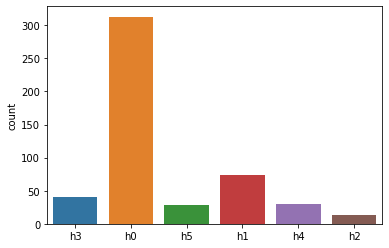

In [70]:
test = pd.read_csv('test.csv')



test.drop(labels = "ID", axis=1, inplace = True)
 

X_test = np.array(test)

predicted_value_k = K_NN.predict(X_test)

sns.countplot(predicted_value_k)


In [63]:
clf = LR(multi_class= "multinomial", solver=  "lbfgs", )

clf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted_labels = clf.predict(X_test)


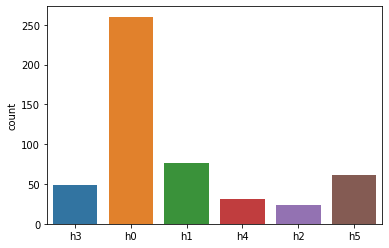

In [75]:
sns.countplot(predicted_labels)